### Aim

The aims of this lab are to get familiar with Jupyter Notebook - a tool for writing interactive reports - and to review some basic Python tools, such as functions.

### Objectives

At the end of this lab, students should be able to:
1. Create lab reports in Jupyter Notebook.
2. Use appropriate built-in Python functions for typical mathematical calculations (minimum/maximum/ sum of an array, creating diagonal matrices, and finding eigenvalues and eigenvectors etc).
3. Vectorize a `for` loop.
4. Write Python functions.
5. Plot 2D graphs.

# Jupyter Notebook

A *Jupyter Notebook* is a tool for writing interactive reports in Python (and in other programming languages). You are using it right now and we are going to work in Jupyter Notebook until the end of the semester. 

A Jupyter Notebook consists of *markdown* cells, *code* cells, and *raw* cells. For instance, this is a markdown cell and below is a code cell that loads packages and generates a random $2\times 2$ matrix. Note that the output generated by the code cell is printed right after the code cell.

We won't be using raw cells.

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import time

A = np.random.rand(2,2)
print(A)

[[0.03618936 0.76128735]
 [0.29042988 0.98727734]]


Markdown cells are those where you write normal text meant to be read by another human being, e.g., your tutor. It is recommended to google "markdown syntax" to get familiar with how you highlight words, create lists etc. 

You can also insert LaTeX equations to a markdown cell. For example, here is a displayed equation:
$$
\sum_{n=1}^{\infty}\frac{1}{n^2}=\frac{\pi^2}{6}
$$
and here is an inline equation: $e^{\pi i}+1=0$. Note that when you run a markdown cell, the text becomes nicely formatted. You can download the whole notebook into a PDF document ready for printing.

### Exercise 1

Change the first code chunk so that it prints a random $4\times4$ matrix and download this Notebook into a PDF.

# Built-in Python functions

First, we are going to prepare some data. The following cell generates and prints the vector $v$ of size $n=7$ with entries $v_k=2+8\cos k$ rounded to 1 decimal place.

In [11]:
n = 7
v = np.around(2 + 8 * np.cos(np.arange(1, n+1)), 1)
print(v)

[ 6.3 -1.3 -5.9 -3.2  4.3  9.7  8. ]


The following Python code calculates the sum of elements of the vector `v` in loop:

In [12]:
S = 0;
for i in range(n):
    S = S + v[i];
S

17.9

The same thing can be done by using the `sum()` function, i.e.,

In [13]:
np.sum(v)

17.9

Computing the sum of elements by issuing a ready Python function is cleaner and simpler than implementing it as a `for` loop. Also, it usually works faster and is easier to understand. Note that calculating the sum of elements of a vector can be also implemented via matrix multiplication, but then the code becomes a bit obscure:

In [14]:
v.dot(np.ones(n))

17.9

### Efficiency comparison

Let's compare efficiency of the three methods to calculate the sum of entries of a matrix. We will create a very large vector with random entries and add its entries using the three methods:
1. `for` loop
2. The function `sum`
3. The dot product

In [15]:
N = 10 ** 7
x = np.random.rand(N)

tic = time.time()
S1 = 0;
for i in range(N):
    S1 = S1 + x[i]

print(S1)
toc = time.time()
print('For loop takes ' , toc - tic, ' sec')

tic = time.time()
S2 = np.sum(x)
print(S2)
toc = time.time()
print('Sum function takes ' , toc - tic, ' sec')

tic = time.time()
S3 = x.dot(np.ones(N))
print(S3)
toc = time.time()
print('Dot product takes ' , toc - tic, ' sec')

5001335.44928619
For loop takes  2.9990859031677246  sec
5001335.4492862625
Sum function takes  0.014039278030395508  sec
5001335.4492862355
Dot product takes  0.0451202392578125  sec


## Exercise 2

Here you will need to figure out what Python codes with loops are designed to do and re-write each of them with a single Python command. In order to do that, you will need to do some google search. For example, if you didn't know how to calculate the sum of entries of a vector in *numpy*, you would google "calculate sum of entries of a vector in numpy". Alternatively, you can browse the *numpy* documentation.

### Part (a)

Figure out what the following sequence of Python commands is designed to do and re-write it as a single native Python command.

In [16]:
ind = 0
M = v[0]
for i in range(1, n):
    if v[i] > M:
        ind = i
        M = v[i]
        
print(ind)

5


### Part (b) 

Figure out what the following sequence of Python commands is designed to do and re-write it as a single native Python command.

In [17]:
A = []
S = 0
for i in range(n):
    S = S + v[i]
    A = np.append(A, S)
print(A)

[ 6.3  5.  -0.9 -4.1  0.2  9.9 17.9]


### Part (c) 

Figure out what the following sequence of Python commands is designed to do and re-write it as a single native Python command.

In [18]:
X = np.zeros((n,n))
for i in range(n):
    X[i, i] = v[i]
    if i < n-1:
        X[i, i+1] = 1
print(X)

[[ 6.3  1.   0.   0.   0.   0.   0. ]
 [ 0.  -1.3  1.   0.   0.   0.   0. ]
 [ 0.   0.  -5.9  1.   0.   0.   0. ]
 [ 0.   0.   0.  -3.2  1.   0.   0. ]
 [ 0.   0.   0.   0.   4.3  1.   0. ]
 [ 0.   0.   0.   0.   0.   9.7  1. ]
 [ 0.   0.   0.   0.   0.   0.   8. ]]


## Solution

### Part (a)

Type your solution here and your code in the cell below

### Part (b)

Type your solution here and your code in the cell below

### Part (c)

Type your solution here and your code in the cell below

# Custom functions

Of course, not all mathematical function that you may need in your work have been already implemented in Python. As an example, let us implement a Python function that calculates the sum of proper divisors of a number $n$. For example, proper divisors of 60 are 1, 2, 3, 4, 5, 6, 10, 12, 15, 20, and 30 and hence the sum of proper divisors of 60 is

In [19]:
1 + 2 + 3 + 4 + 5 + 6 + 10 +12 + 15 +20 + 30

108

Proper divisors of 60 are numbers $k$ between 1 and 59 such that the remainder of dividing 60 by $k$ is 0. First, let us generate all numbers between 1 and 59:

In [20]:
np.arange(1, 60)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

Now let us find the remainder of dividing 60 by all of them

In [21]:
60 % np.arange(1, 60)

array([ 0,  0,  0,  0,  0,  0,  4,  4,  6,  0,  5,  0,  8,  4,  0, 12,  9,
        6,  3,  0, 18, 16, 14, 12, 10,  8,  6,  4,  2,  0, 29, 28, 27, 26,
       25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

Now we generate the array of positions of divisors of 60:

In [22]:
1 * (60 % np.arange(1, 60) == 0)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

And here are the divisors themselves:

In [23]:
np.arange(1, 60) * (60 % np.arange(1, 60) == 0)

array([ 1,  2,  3,  4,  5,  6,  0,  0,  0, 10,  0, 12,  0,  0, 15,  0,  0,
        0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

The sum of divisors of 60 is therefore

In [24]:
np.sum(np.arange(1, 60) * (60 % np.arange(1, 60) == 0))

108

Recall the following Python construction that defines a function

In [25]:
def sum_of_divisors(n):
    return np.sum(np.arange(1, n) * (n % np.arange(1, n) == 0))

Now we can calculate the sum of divisors of any number

In [26]:
sum_of_divisors(28)

28

## Exercise 3

### Part (a)

Write a Python function that takes a positive integer $n$ as input and returns the number of its proper divisors

### Part (b)

Write a Python function that takes a positive integer $n$ as input and returns 1 if $n$ is a prime number and 0 otherwise

### Part (c)

Write a Python function that takes a positive integer $n$ as input and returns the list of its proper divisors

## Solution

### Part (a)

Type your solution here and your code in the cell below

### Part (b)

Type your solution here and your code in the cell below

### Part (c)

Type your solution here and your code in the cell below

# Vectorizing a loop

One often needs to apply a function to each element of a vector. For instance, the following loop produces a vector `s` whose entries are squares of the vector `v`.

In [27]:
s = v-v
for i in range(n):
    s[i] = v[i] ** 2

print(s)

[39.69  1.69 34.81 10.24 18.49 94.09 64.  ]


Of course, if we need to apply the square function to each entry of a vector, there is a native Python operation for that:

In [28]:
print(v ** 2)

[39.69  1.69 34.81 10.24 18.49 94.09 64.  ]


But what if we want to apply a function that can't be expressed as a simple formula to each entry of a vector? In order to do this, we use the *numpy* function `vectorize` whose input is a function(!) and whose output is the vectorized version of the same function. Let's see how it works with the square function first. 

In [29]:
def square(x):
    return x ** 2

square_vectorized = np.vectorize(square)

print(square_vectorized(v))

[39.69  1.69 34.81 10.24 18.49 94.09 64.  ]


Note that, strictly speaking, we did not have to do this because our `square` function accepts an argument `x` that may be a vector and it will work correctly for a vector input. Nevertheless, let's compare efficiency of the three ways to square each entry of a vector.

There is one more way to do it that also uses a `for` loop but the loop is nicely formatted and is more human-interpretable than the explicit `for` loop. Note, however, that the result has type `list`

In [30]:
[i ** 2 for i in v]

[39.69,
 1.6900000000000002,
 34.81,
 10.240000000000002,
 18.49,
 94.08999999999999,
 64.0]

## Compare efficiency

We will see that the explicit `for` loop is the least efficient method of applying a function to each entry of an array and a native *numpy* function is the most efficient.

In [31]:
tic = time.time()
S1 = np.zeros(N);
for i in range(N):
    S1[i] = x[i] ** 2

print(S1[np.arange(10)])
toc = time.time()
print('Explicit for loop takes ', toc - tic, ' sec')

tic = time.time()
S2 = x ** 2
print(S2[np.arange(10)])
toc = time.time()
print('Native numpy function takes ', toc - tic, ' sec')

tic = time.time()
S3 = square_vectorized(x)
print(S3[np.arange(10)])
toc = time.time()
print('Vectorize takes ' , toc - tic, ' sec')

tic = time.time()
S4 = [i ** 2 for i in x]

print(S4[0:10])
toc = time.time()
print('Nicely formatted for loop takes ', toc - tic, ' sec')

[0.62788906 0.74649544 0.76527967 0.24065967 0.0071594  0.74187946
 0.13918479 0.26739358 0.45921859 0.72533498]
Explicit for loop takes  4.6954522132873535  sec
[0.62788906 0.74649544 0.76527967 0.24065967 0.0071594  0.74187946
 0.13918479 0.26739358 0.45921859 0.72533498]
Native numpy function takes  0.022059202194213867  sec
[0.62788906 0.74649544 0.76527967 0.24065967 0.0071594  0.74187946
 0.13918479 0.26739358 0.45921859 0.72533498]
Vectorize takes  3.2302372455596924  sec
[0.6278890578538073, 0.7464954407534106, 0.7652796742786969, 0.24065966953230597, 0.00715939622366552, 0.7418794560571965, 0.13918479410665568, 0.26739358341310987, 0.4592185899765918, 0.725334980038374]
Nicely formatted for loop takes  3.387784004211426  sec


## Non-numpy function

Now let's look at an example of vectorizing a non-native *numpy* function, e.g., the function `sum_of_divisors` from the previos section. Note that trying to run something like `sum_of_divisors(np.arange(0, 60))` will result in an error message because the function `sum_of_divisors` is essentially a function of a scalar input.

To calculate the sum of divisors of $n$ for all $n=1,2,3,\cdots,60$, we will need to vectorize it

In [32]:
sum_of_divisors_vec = np.vectorize(sum_of_divisors)
print(sum_of_divisors_vec(np.arange(1, 61)))

[  0   1   1   3   1   6   1   7   4   8   1  16   1  10   9  15   1  21
   1  22  11  14   1  36   6  16  13  28   1  42   1  31  15  20  13  55
   1  22  17  50   1  54   1  40  33  26   1  76   8  43  21  46   1  66
  17  64  23  32   1 108]


## Exercise 4

The following chunk of Python code applies a certain function to all entries of the vector $v=(1,2,\cdots,60)$. Figure out which function is applied here and re-write this code chunk using `vectorize` so that the function is applied to $v$ in one Python command. As an extra challenge, try to define the function without using a loop.

In [33]:
n = 60
v = np.arange(1, n+1)

s = []
for i in range(n):
    D = 2
    p = 0
    while (D <= v[i]) and (v[i]%D == 0):
        p = p + 1
        D = D * 2
    s.append(p)

print(s)

[0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 5, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 1, 0, 4, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2]


### Solution 

Type your solution here and your code in the cell below

Type your alternative solution here and your code in the cell below

## Exercise 5

Fibonacci numberes $F_n$ are defined by the recurrence relation $F_0=0$, $F_1=1$ and $F_{n}=F_{n-1}+F_{n-2}$ for $n\ge 2$. A few first Fibonacci numbers are $0, 1, 1, 2, 3, 5, 8$. 

The following Python function returns the $n$th Fibonacci number. It is implemented in the way that mimics the defining recurrence relation.

In [34]:
def fibonacci (n):
    if n == 0:
        out = 0
    elif n == 1:
        out = 1
    else:
        out = fibonacci (n -1) + fibonacci (n -2)
    return out

In [35]:
fibonacci(15)

610

### Part (a)

Use a `for` to write a function that takes a positive integer value $n$ as input, and returns the $n$th Fibonacci number. You will need to store Fibonacci numbers in an array and calculate them one by one.

### Part (b)

Use the following matrix identity to write a function that calculates the $n$th Fibonacci number via matrix power without a loop or a recursion:
$$
\begin{bmatrix}
F_{n}\\
F_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
F_{n-1}+F_{n-2}\\
F_{n-1}
\end{bmatrix}=A\cdot
\begin{bmatrix}
F_{n-1}\\
F_{n-2}
\end{bmatrix}
$$

You will need to find $A$ in this identity

### Part (c)

Compare the three Fibonacci functions. Which of them is the slowest? Why? You will need to use the same technique as we used above to compare different ways to apply a function to each entry of an array.

## Solution

### Part (a)

Type your solution here and your code in the cell below

### Part (b)

Type your solution here and your code in the cell below

### Part (c)

Type your solution here and your code in the cell belowcode in the cell below

# Plotting

The Python library compatible with *numpy* types and functions that is usually used for plotting is *matplotlib.pyplot*. It was imported in the first code cell of this Notebook. Below we just review some basic functionality.

A basic function in *matplotlib.pyplot* for plotting a 2D graph is `plot`. If it is called with one vector input of size $n$, say, $y$, then it will plot a line through points $(1, y_1)$, $(2, y_2)$, $(3, y_3)$ etc. If it is called with two vector inputs $x$ and $y$, then it will plot a line through points $(x_1,y_1)$, $(x_2, y_2)$, $(x_3, y_3)$ etc.

The command `plot` should be followed by the command `show` that actually makes the plot appear on the screen.

### Example 1

Here we will plot the sum of proper divisors of $n$ vs $n$ for $1\le n\le 60$

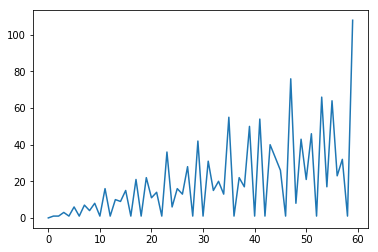

In [36]:
plt.plot(sum_of_divisors_vec(np.arange(1, 61)))
plt.show()

### Example 2

Here we will plot the graph of the function $f(x)=\frac{1}{1+e^{-x}}$ for $-3\le x\le 3$

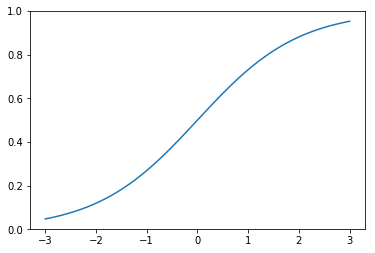

In [37]:
x = np.linspace(start = -3, stop = 3, num = 301)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.show()

It is recommended to read the manual on the `plot` function and to look for examples of plotting online.

In [38]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu

## Exercise 6

Consider the series
$$
\sum_{n=1}^\infty \cos n
$$
and its partial sums
$$
A_n=\sum_{k=1}^{n}\cos k,\quad k=1,2,3,\cdots
$$

### Part (a)

Without using any loop or recursion, write a single Python command that calculates partial sums $A_1,A_2,\dots,A_{300}$

### Part (b)

Plot the $n$'th partial sum $A_n$ vs $n$ for $1\le n\le 300$

### Part (c)

Does the series appear to converge? If so, to what value (in 2 significant digits)? If not, can you prove it?

### Part (d)

Are partial sums bounded? Can you prove it?

## Solution

### Part (a)

Type your code in the cell below

### Part (b)

Type your code in the cell below

### Part (c)

Type your solution here 

### Part (d)

Type your solution here 

# Conclusion

In today's lab, we covered some material familiar from Algorithms and Computing I and II - Python functions and basic plotting tools. Besides, we reviewed methods to vectorize Python codes offered by the library *numpy*, some familiar from weeks 1-2, some new (the function `vectorize`). The main takeaway is that a vectorized code, if implemented properly, is better than an explicit loop because it is more efficient and more readable. Also, whenever possible it is recommended not to reinvent the wheel and to use functions that already have been implemented in Python instead of writing your own versions. For instance, functions for sum, cumulative sum, max and min are available in *numpy*.

From now on, we are going to work in Jupyter Notebook all the time. All your lab handouts, the quiz, the midterm test, and the final report will be Jupyter Notebooks.

Now please fill the following survey form to provide your feedback on the course:

https://tinyurl.com/mh2401-week3-feedback

For instance, the course instructors need to know if this handout is sufficient to understand the material and if lab assistants are helpful and their explanations are clear.